In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()


df=pd.read_csv("D:\Downloads\data1.csv\data1.csv")
#df = data.copy()
df.tail()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
215904,2579717,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 17:00:00,2019-06-01 19:38:00,AVE,47.3,Turista,Promo
215905,2579718,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 18:00:00,2019-06-01 20:32:00,AVE,47.3,Turista,Promo
215906,2579719,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 19:00:00,2019-06-01 21:38:00,AVE,47.3,Turista,Promo
215907,2579720,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 20:35:00,2019-06-01 23:15:00,AVE,47.3,Turista,Promo
215908,2579721,2019-04-19 05:31:30,MADRID,SEVILLA,2019-06-01 21:25:00,2019-06-02 00:10:00,AV City,52.2,Turista Plus,Promo


In [208]:
df.columns

Index(['Unnamed: 0', 'insert_date', 'origin', 'destination', 'start_date',
       'end_date', 'train_type', 'price', 'train_class', 'fare'],
      dtype='object')

In [209]:
df=df.drop(['Unnamed: 0'],axis=1)

In [210]:
df.columns

Index(['insert_date', 'origin', 'destination', 'start_date', 'end_date',
       'train_type', 'price', 'train_class', 'fare'],
      dtype='object')

In [211]:
df.shape

(215909, 9)

In [212]:
df.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

In [213]:
df.describe()

,price
count,202321.000000
mean,56.723877
std,25.531787
min,16.600000
25%,28.350000
50%,53.400000
75%,76.300000
max,206.800000


In [214]:
df.describe(include="all")

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,30543,5,5,2231,2870,16,NaN,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


In [215]:
df.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

In [216]:
df.loc[df['price'].isnull(), 'price']=df['price'].mean()

In [217]:
df.dropna(subset=['train_class'], inplace=True)

In [218]:
df=df.drop(['insert_date'],axis=1)

In [219]:
df.isnull().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

In [220]:
df.tail()

,origin,destination,start_date,end_date,train_type,price,train_class,fare
215904,MADRID,SEVILLA,2019-06-01 17:00:00,2019-06-01 19:38:00,AVE,47.3,Turista,Promo
215905,MADRID,SEVILLA,2019-06-01 18:00:00,2019-06-01 20:32:00,AVE,47.3,Turista,Promo
215906,MADRID,SEVILLA,2019-06-01 19:00:00,2019-06-01 21:38:00,AVE,47.3,Turista,Promo
215907,MADRID,SEVILLA,2019-06-01 20:35:00,2019-06-01 23:15:00,AVE,47.3,Turista,Promo
215908,MADRID,SEVILLA,2019-06-01 21:25:00,2019-06-02 00:10:00,AV City,52.2,Turista Plus,Promo


# Number of people boarding from different stations 

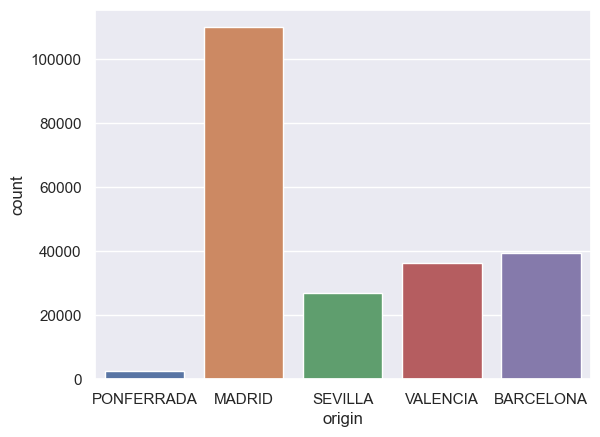

In [221]:
sns.countplot(x='origin', data=df, hue='origin');

Most people are starting from Madrid and very few people are starting from Ponferrada

<Axes: xlabel='destination', ylabel='count'>

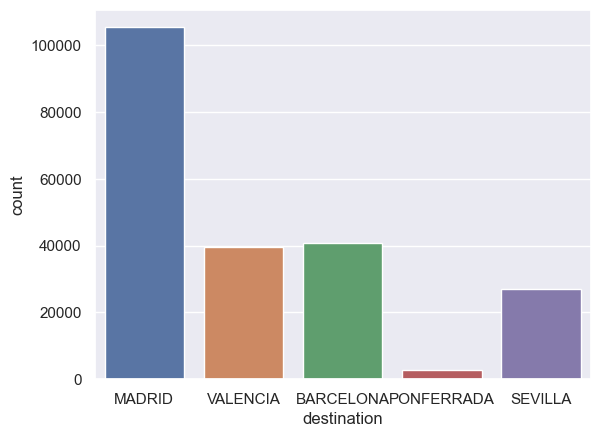

In [222]:
sns.countplot(x='destination', data=df, hue='destination')

Most people go to Madrid and very less people go to Ponferrada 

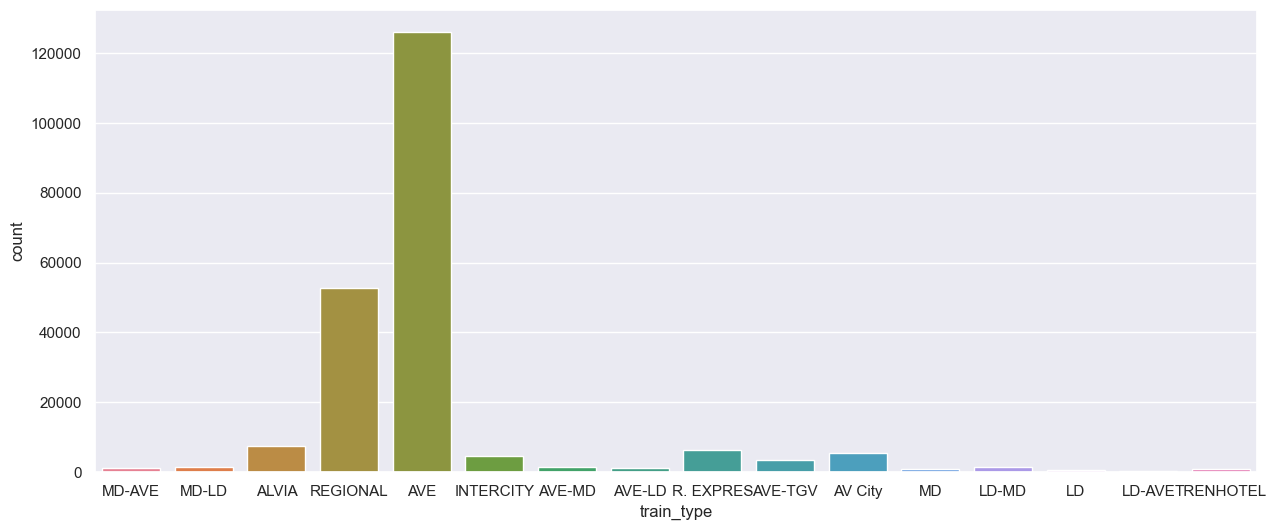

In [223]:
plt.figure(figsize=(15,6));
sns.countplot(x='train_type', data=df, hue='train_type');

maximum train that runs is Ave 

# Number od different train classes 

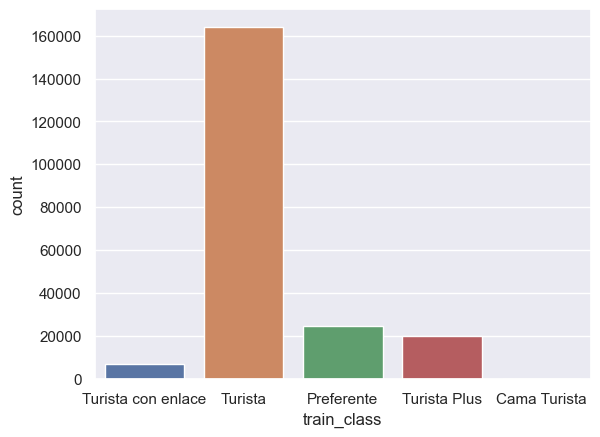

In [224]:
sns.countplot(x='train_class', data=df, hue='train_class');

The most common train class is Turista

# Categories of tickets :

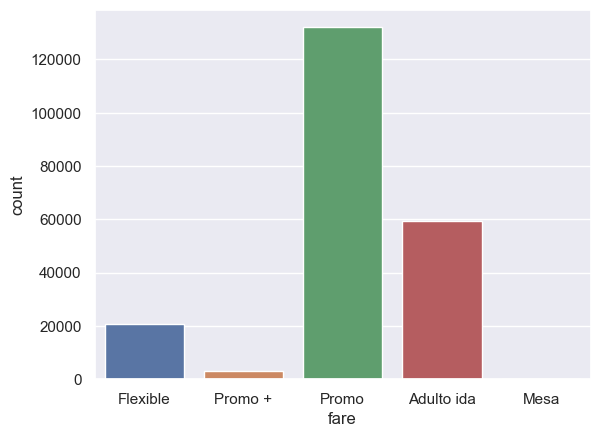

In [225]:
sns.countplot(x='fare', data=df, hue='fare');

Most tickets are bought from Promo Fare category 

# Ticket prices plot

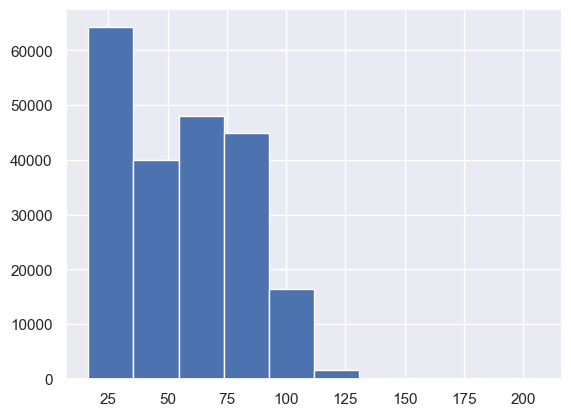

In [226]:
plt.hist(df['price'], bins=10);

Maximum number of tickets are bought aroud range 25-100 dollars and very less tickets are bought for 125 

# Box plot between train class and price 

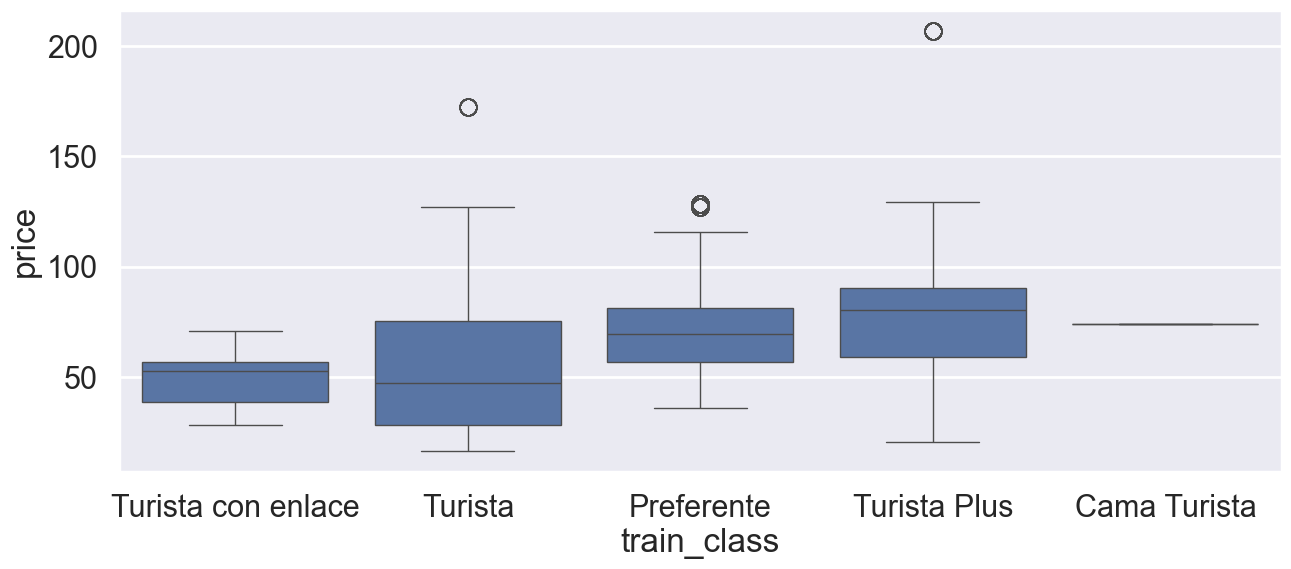

In [227]:
plt.figure(figsize=(15,6));
sns.set_context('poster')
sns.boxplot(x='train_class', y='price', data=df);

Fare increases from left to right 

# Box plot between train type and price 

C:\Users\India\AppData\Local\Temp\ipykernel_11080\3218788356.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


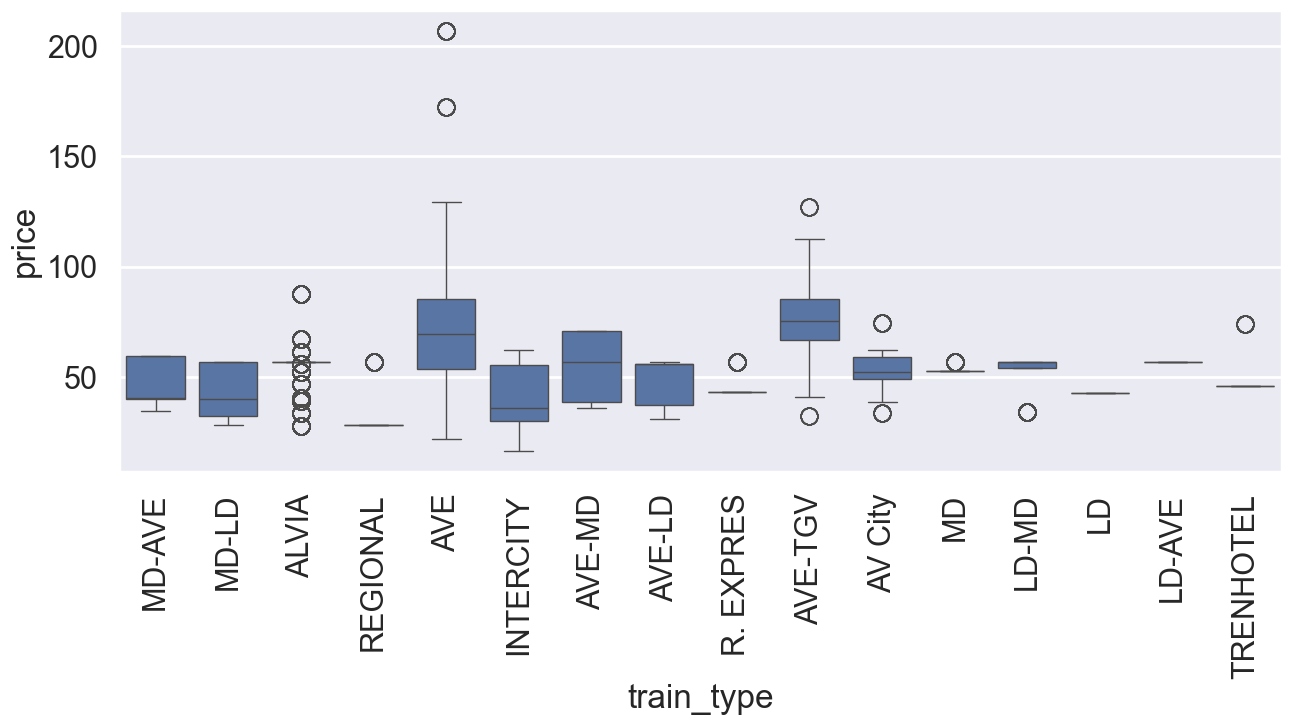

In [228]:
plt.figure(figsize=(15,6));
sns.set_context('poster')
chart=sns.boxplot(x='train_type', y='price', data=df);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

AVE and AVE-TGV has highest fare 

In [229]:
df = df.reset_index()

In [230]:
import datetime
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = datetime.datetime.strptime(b, datetimeFormat)- datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)  


In [231]:
df['travel_time_in_hrs'] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1) 

In [232]:
df.drop(['end_date','start_date'], axis=1, inplace=True)
df.head()  

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.700000
1,1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.800000
2,2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,5.916667
3,3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,4.983333
4,4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,4.133333


In [233]:
df.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.700000
1,1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.800000
2,2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,5.916667
3,3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,4.983333
4,4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,4.133333


# People travelling from Madrid to Sevilla 

In [234]:
df1=df.loc[(df['origin']=='MADRID') & (df['destination']=='SEVILLA')]
df1

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
364,364,MADRID,SEVILLA,AV City,49.150000,Turista,Promo,2.916667
365,365,MADRID,SEVILLA,ALVIA,56.723877,Preferente,Promo,2.733333
366,366,MADRID,SEVILLA,AVE,69.400000,Preferente,Promo,2.633333
367,367,MADRID,SEVILLA,AVE,76.300000,Turista,Flexible,2.533333
368,368,MADRID,SEVILLA,ALVIA,56.723877,Preferente,Promo,2.600000
...,...,...,...,...,...,...,...,...
215261,215904,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.633333
215262,215905,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.533333
215263,215906,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.633333
215264,215907,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.666667


# Train type that travels most 

C:\Users\India\AppData\Local\Temp\ipykernel_11080\1134106603.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


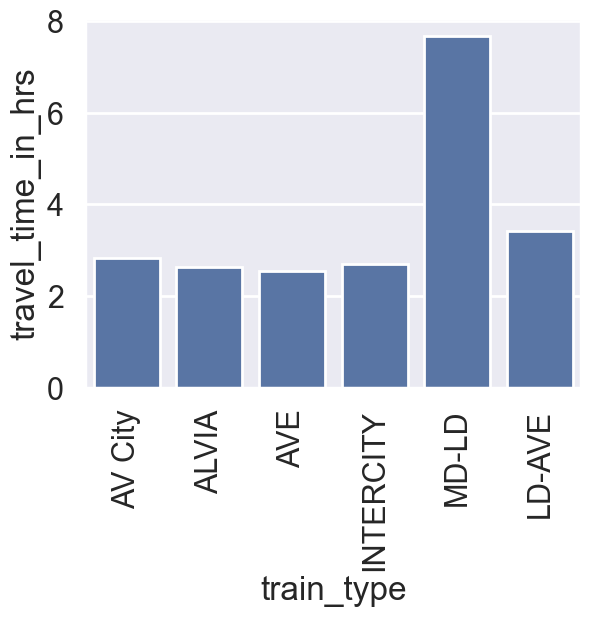

In [236]:

chart=sns.barplot(x='train_type', y='travel_time_in_hrs', data=df1);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


MD-LD travels most 

# People travelling from Madrid to Barcelona 

In [237]:
df2= df.loc[(df['origin']=='MADRID') & (df['destination']=='BARCELONA')]
df2.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
79,79,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667
80,80,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667
81,81,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667
82,82,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667
83,83,MADRID,BARCELONA,AVE,66.75,Turista,Promo,3.150000


In [238]:
from sklearn.preprocessing import LabelEncoder

In [239]:
lab_en = LabelEncoder()
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])
df.iloc[:,6] = lab_en.fit_transform(df.iloc[:,6])

In [240]:
df.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,2,1,11,59.50,4,1,4.700000
1,1,2,1,11,34.65,4,4,5.800000
2,2,2,1,12,39.95,4,4,5.916667
3,3,2,1,11,40.60,4,4,4.983333
4,4,2,1,0,27.90,2,3,4.133333


In [241]:
X = df.drop(['index','price'], axis=1)
Y = df['price']

In [242]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y, test_size=0.3, random_state=25, shuffle=True)

In [243]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [244]:
lr.fit(X_train,Y_train)

LinearRegression()

In [245]:
lr_predict = lr.predict(X_test)

In [246]:
lr_predict_train = lr.predict(X_train)

In [247]:
from sklearn.metrics import r2_score

In [248]:
lr_r2_test= r2_score(Y_test, lr_predict)
print('r2 score for testing:', lr_r2_test)

r2 score for testing: 0.7304404433036409


In [249]:
lr_r2_train = r2_score(Y_train, lr_predict_train)
print('r2 score for training:', lr_r2_train)

r2 score for training: 0.7250571229406169


In [250]:
print('R2 score for Linear Regression Training Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test)

R2 score for Linear Regression Training Data is:  0.7250571229406169
R2 score for Linear Regression Testing Data is:  0.7304404433036409
